# Classification Project MVP
### Predicting customer churn for a telecom company

The goal of my project is to predict which customers will churn for a telecom company. The company wants as few false negatives as possible without losing too much precision, so I chose the F2 score as my evaluation metric, which balances precision and recall but gives a higher weight to recall. 

After cleaning the data, I tested a few different models and found that, surprisingly, the LogisticRegression model gave the best F2 score. I then handled the imbalance in the dataset by trying different class weights and found that a 5:1 class weights gave the best F2 score. 

Below is the code for my best current model. It gives an F2 score of 0.925 (precision of 0.791, recall of 0.966). 

I have also included the model's confusion matrix, where you can see that there are a fair amount of false postives, but few false negatives (which is what I want). 

#### Importing packages 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, fbeta_score, make_scorer, confusion_matrix

#### Reading the CSV

In [4]:
telco_df = pd.read_csv('telco_merged_modelling.csv') #reading the cleaned CSV 

#### Setting features and target, scaling features, splitting data

In [ ]:
X = telco_df.drop(columns = ['Churn Value']) #setting features and target
y = telco_df['Churn Value'].values

std_scale = StandardScaler() #scaling features 
X_scaled = std_scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42, stratify=y) #splitting data

### Cross validating and scoring the LogisticRegression model

In [5]:
scoring = {'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f2_score' : make_scorer(fbeta_score, beta=2)}

model = LogisticRegression(class_weight={1 : 5, 0 : 1}, solver='liblinear')

results = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)

for metric_name in results.keys():
    average_score = np.average(results[metric_name])
    print("Metric:", metric_name)
    print("Scores:", results[metric_name])
    print("Average score:", average_score)
    print(" ")

Metric: fit_time
Scores: [0.06710601 0.07648897 0.07248473 0.06588578 0.08434415]
Average score: 0.0732619285583496
 
Metric: score_time
Scores: [0.00767493 0.00702    0.00704217 0.00644302 0.00664186]
Average score: 0.006964397430419922
 
Metric: test_precision
Scores: [0.81460674 0.79281768 0.81058496 0.78074866 0.75733333]
Average score: 0.7912182751566506
 
Metric: test_recall
Scores: [0.96989967 0.95986622 0.97324415 0.97658863 0.94983278]
Average score: 0.9658862876254182
 
Metric: test_f2_score
Scores: [0.93427835 0.92105263 0.93569132 0.92993631 0.90388288]
Average score: 0.9249682966606366
 


### Creating a confusion matrix

As mentioned above, the confusion matrix shows that the model gives a fair amount false postives, but few false negatives, which is what I want. 

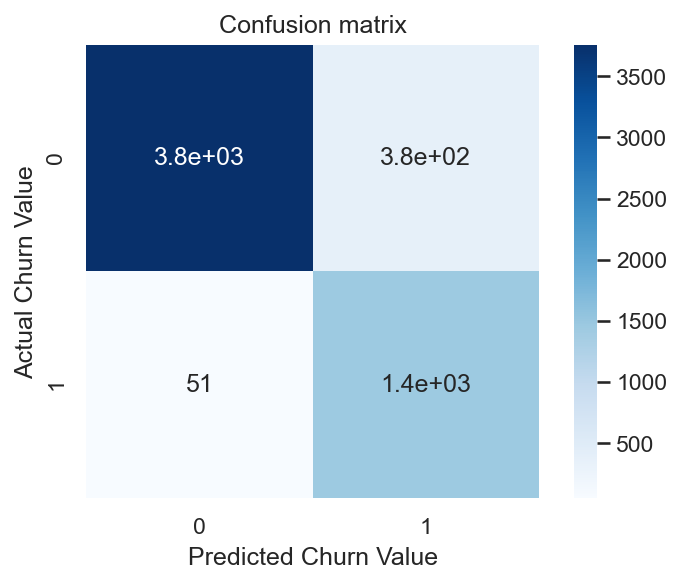

In [6]:
model = LogisticRegression(class_weight={1 : 5, 0 : 1}, solver='liblinear')

y_pred = cross_val_predict(model, X_train, y_train, cv=5)
conf_mat = confusion_matrix(y_train, y_pred)

plt.figure(dpi=150)
sns.heatmap(conf_mat, cmap=plt.cm.Blues, annot=True, square=True)
plt.xlabel('Predicted Churn Value')
plt.ylabel('Actual Churn Value')
plt.title('Confusion matrix');